In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy as sp

### Function to Optimize
$F(x,y) = \sin\left(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3\right)\cos\left(2x + 1 - \epsilon^y\right)$

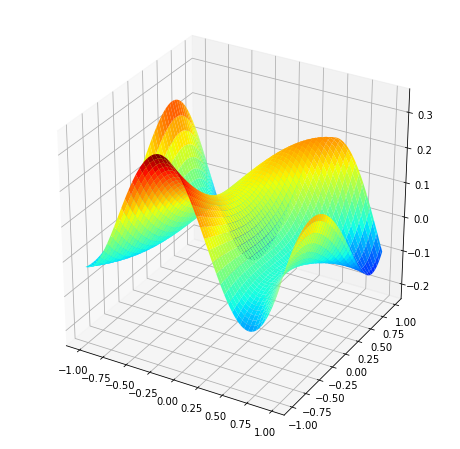

In [17]:
func = lambda th: np.sin( (np.power(th[0],2)/2) - (np.power(th[1],2)/4) + 3) * \
                  np.cos(2*th[0] + 1 - np.power(np.e,th[1]))

n = 100
xs, ys = np.meshgrid(range(n), range(n))
xs = (xs - n/2) * 2 / n
ys = (ys - n/2) * 2 / n
zs = func([xs, ys])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(xs, ys, zs, cmap='jet')

plt.show()

In [84]:
xv = np.linspace(-2,2,n)
yv = np.linspace(-2,2,n)
zv = np.zeros((n,n))

for ix, x in enumerate(xv):
    for iy, y in enumerate(yv):
        zv[iy, ix] = func([x,y])

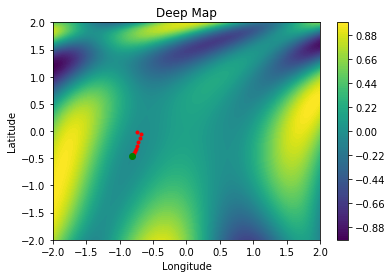

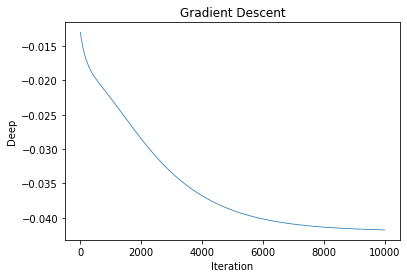

In [87]:
plt.contourf(xv, yv, zv, n)
plt.colorbar()

theta = np.random.rand(2) * 2 - 1

h = 0.001
lr = 0.001
grad = np.zeros(2)
nit = 10000

theta_res = np.zeros(nit)
for i in range(nit):
    ttheta = np.copy(theta)
    
    for j in range(len(theta)):
        ttheta[j] = ttheta[j] + h
        
        # derivate in ith variable
        grad[j] = (func(ttheta) - func(theta)) / h

    theta = theta - (lr * grad)
    theta_res[i] = func(theta)
    
    if((i % 1000) == 0):
        plt.plot(theta[0], theta[1], '.', c='red')
        
plt.title('Deep Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(theta[0], theta[1], 'o', c='green')
plt.show()

plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Deep')    
plt.plot(np.arange(nit), theta_res, linewidth=0.75)
plt.show()